In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
btc_price = pd.read_csv("bitcoin_daily_price.csv")
btc_price['timestamp'] = pd.to_datetime(btc_price['timestamp'])



In [3]:
# Basic overview
print(btc_price.info())
print(btc_price.describe())
print(btc_price.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeOpen   397 non-null    object             
 1   timeClose  397 non-null    object             
 2   timeHigh   397 non-null    object             
 3   timeLow    397 non-null    object             
 4   name       397 non-null    int64              
 5   open       397 non-null    float64            
 6   high       397 non-null    float64            
 7   low        397 non-null    float64            
 8   close      397 non-null    float64            
 9   volume     397 non-null    float64            
 10  marketCap  397 non-null    float64            
 11  timestamp  397 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(4)
memory usage: 37.3+ KB
None
         name          open          high           low         close  \
co

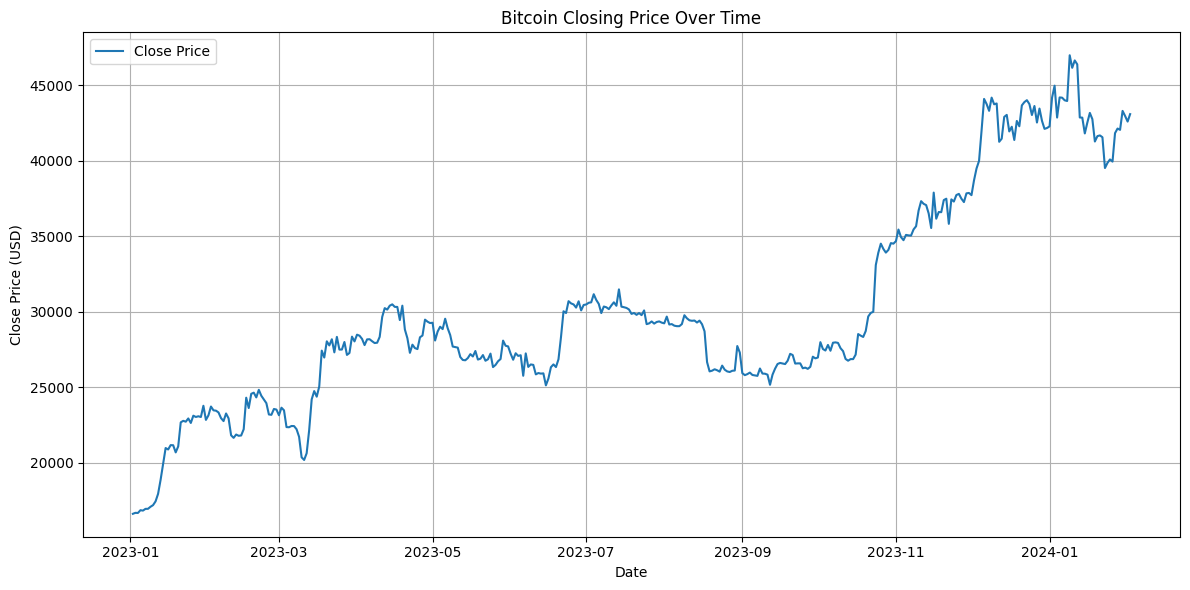

In [4]:
# Plot: Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(btc_price['timestamp'], btc_price['close'], label='Close Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

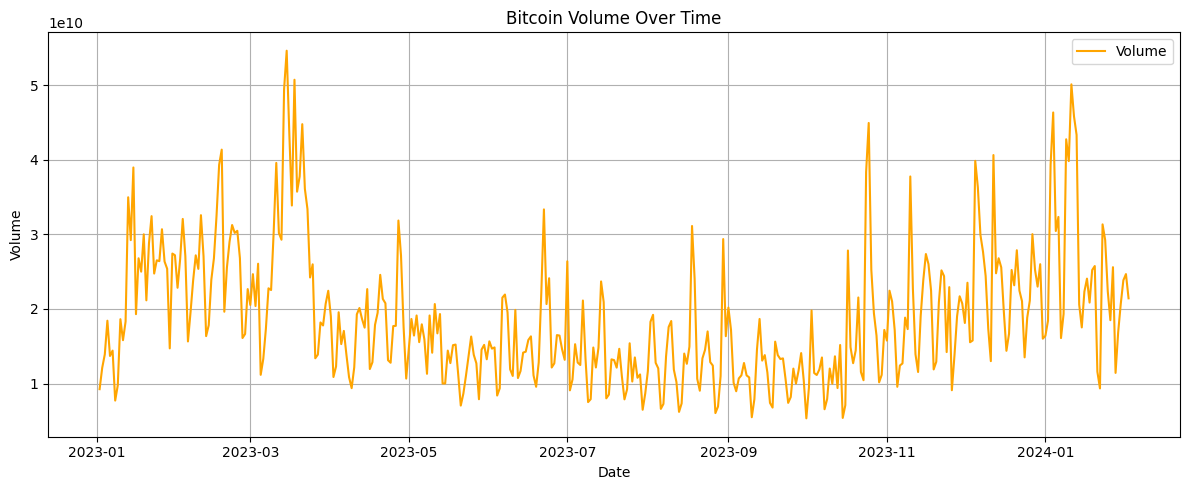

In [5]:
# Plot: Volume Over Time
plt.figure(figsize=(12, 5))
plt.plot(btc_price['timestamp'], btc_price['volume'], color='orange', label='Volume')
plt.title('Bitcoin Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

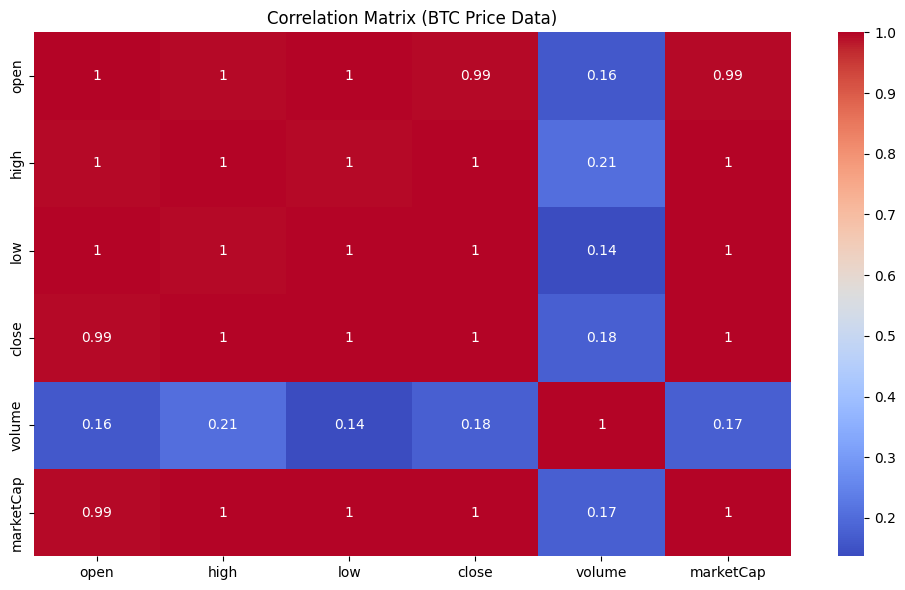

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(btc_price[['open', 'high', 'low', 'close', 'volume', 'marketCap']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (BTC Price Data)')
plt.tight_layout()
plt.show()

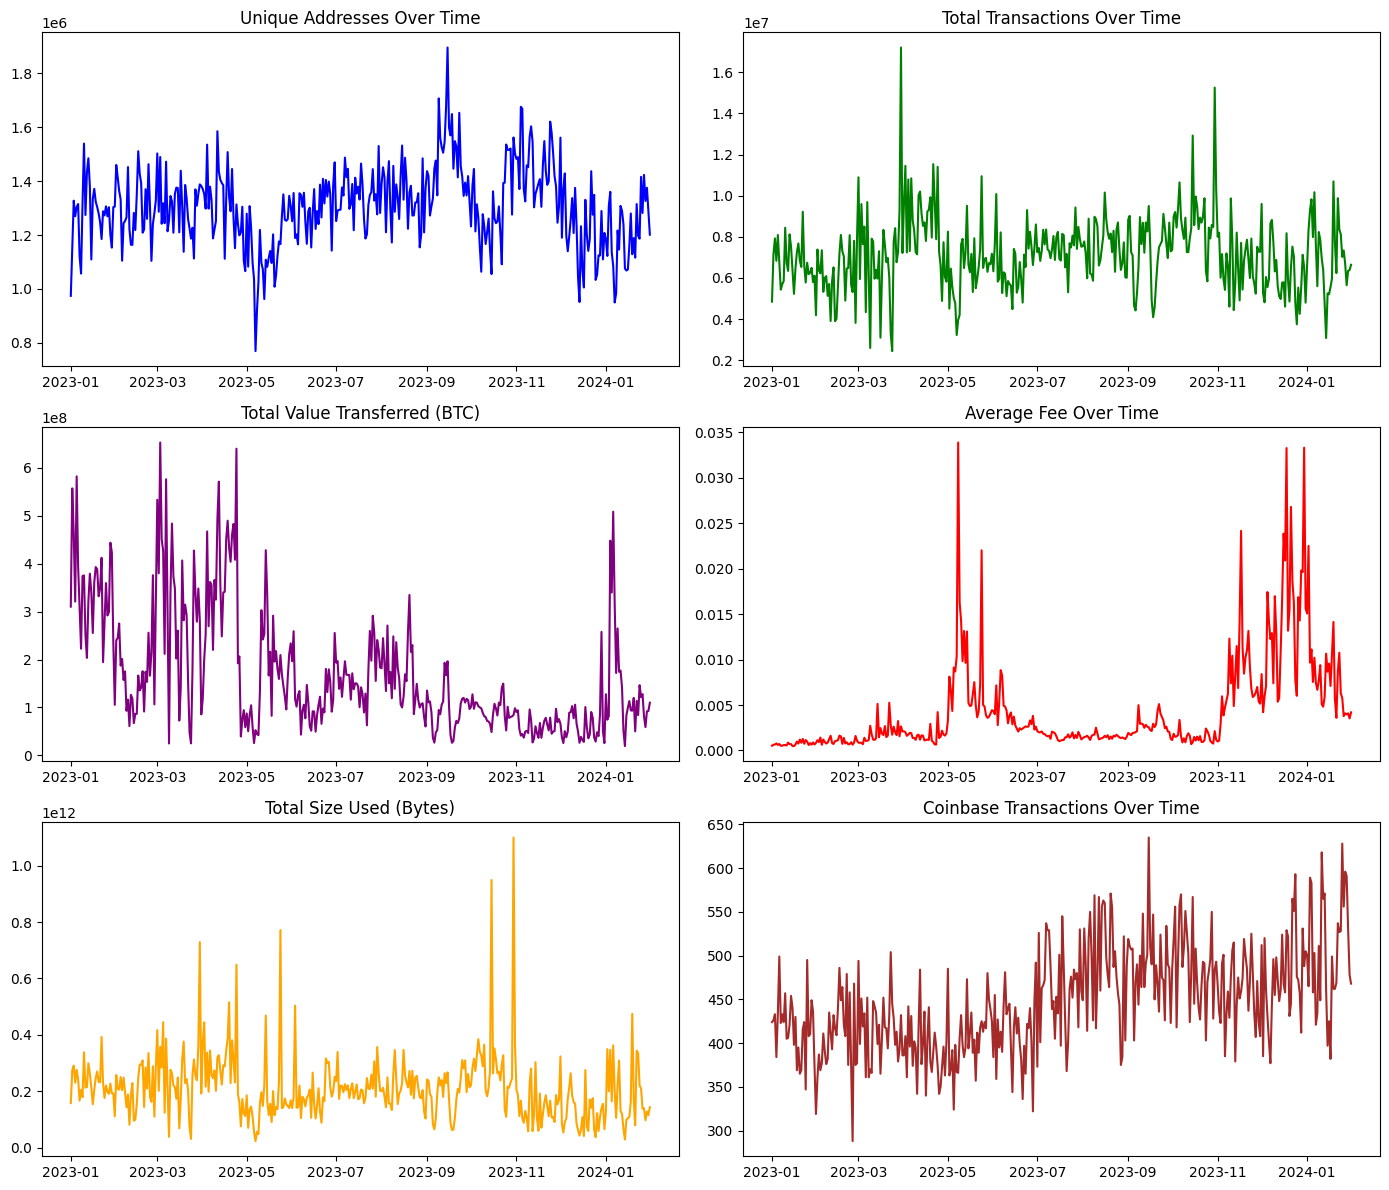

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bitcoin_transaction_statistics.csv")
df['day'] = pd.to_datetime(df['day'])

# Plot all metrics
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.ravel()

# Plotting each
axs[0].plot(df['day'], df['unique_addresses'], color='blue'); axs[0].set_title('Unique Addresses Over Time')
axs[1].plot(df['day'], df['total_transactions'], color='green'); axs[1].set_title('Total Transactions Over Time')
axs[2].plot(df['day'], df['total_value_transferred'], color='purple'); axs[2].set_title('Total Value Transferred (BTC)')
axs[3].plot(df['day'], df['average_fee'], color='red'); axs[3].set_title('Average Fee Over Time')
axs[4].plot(df['day'], df['total_size_used'], color='orange'); axs[4].set_title('Total Size Used (Bytes)')
axs[5].plot(df['day'], df['coinbase_transactions'], color='brown'); axs[5].set_title('Coinbase Transactions Over Time')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
btc_price = pd.read_csv("bitcoin_daily_price.csv")
btc_tx = pd.read_csv("bitcoin_transaction_statistics.csv")
eth_price = pd.read_csv("eth_daily.csv")
eth_tx_more = pd.read_csv("eth_more_transaction_statistics.csv")
eth_tx_count = pd.read_csv("eth_number_of_transactions.csv")

# Format date columns
btc_price['date'] = pd.to_datetime(btc_price['timestamp'])
btc_tx['day'] = pd.to_datetime(btc_tx['day'])
eth_price['snapped_at'] = pd.to_datetime(eth_price['snapped_at'])
eth_tx_more['day'] = pd.to_datetime(eth_tx_more['day'], errors='coerce')
eth_tx_count['Date'] = pd.to_datetime(eth_tx_count['Date'], errors='coerce')

# --- Basic Descriptive Statistics ---
print("BTC Price Stats:\n", btc_price[['open', 'high', 'low', 'close', 'volume']].describe())
print("\nBTC Transactions Stats:\n", btc_tx.describe())
print("\nETH Price Stats:\n", eth_price[['open', 'market_cap', 'total_volume']].describe())
print("\nETH Transactions Stats:\n", eth_tx_more.describe())

# --- Missing Value Check ---
print("\nMissing BTC Price:\n", btc_price.isnull().sum())
print("Missing ETH Price:\n", eth_price.isnull().sum())
print("Missing BTC TX Stats:\n", btc_tx.isnull().sum())
print("Missing ETH TX Stats:\n", eth_tx_more.isnull().sum())

# --- Visualization Section ---
plt.figure(figsize=(12,6))
plt.plot(btc_price['date'], btc_price['close'], label='BTC Close Price')
plt.plot(eth_price['snapped_at'], eth_price['open'], label='ETH Open Price')
plt.legend()
plt.title("BTC vs ETH Price Trend")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Transaction Trends BTC
plt.figure(figsize=(10,5))
plt.plot(btc_tx['day'], btc_tx['total_transactions'], label='BTC Transactions')
plt.title("Bitcoin Daily Transactions")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()

# Transaction Volume ETH
plt.figure(figsize=(10,5))
plt.plot(eth_tx_more['day'], eth_tx_more['total_value_transferred'], label='ETH Value Transferred')
plt.title("ETH Total Value Transferred Over Time")
plt.xlabel("Date")
plt.ylabel("ETH Value Transferred")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Plot
btc_corr = btc_tx[['unique_addresses', 'total_transactions', 'average_fee', 'total_value_transferred']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(btc_corr, annot=True, cmap='coolwarm')
plt.title("BTC Transaction Feature Correlation")
plt.tight_layout()
plt.show()
